# Probability visualization

This notebook show some example of real dataset visualizations. I'll focus here solely on the representations without the details about the code. 

Reference: https://seaborn.pydata.org/tutorial/distributions.html

## Libraries

In [87]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import pandas as pd

%matplotlib inline
plt.show()

### Let's at first visualize a histogram

> This plot immediately affords a few insights about the flipper_length_mm variable. For instance, we can see that the most common flipper length is about **195 mm**, but the distribution appears bimodal, so this one number does not represent the data well.

Histogram can be used to tell us how some features are more common than others. 

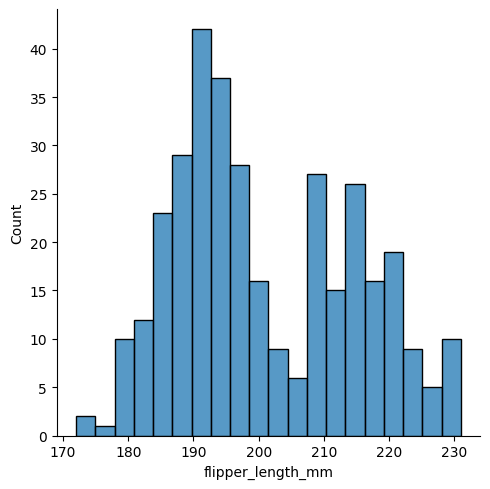

In [26]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm", binwidth=3)
plt.show()

### Why a Bar Plot is Important:

Bar plots are particularly useful for **categorical** data analysis as they provide a visual comparison of quantities across different categories. 

In the context of biological data which is our example, such as measurements from different species, bar plots can help in quickly identifying patterns, differences, and anomalies in the data. For instance, comparing the flipper lengths (`flipper_length_mm`) of different penguin species using a bar plot can reveal species-specific traits and aid in ecological or evolutionary studies.

#### Why Normalization is Important When Comparing Features Across Different Species:

**Normalization** in the context of plotting distributions is important because it allows for a **fair** comparison between categories that may not be equally represented in the dataset. 

For example:

*Count vs. Density*: When visualizing data without normalization, the plot displays the absolute counts of observations in each category. This can be misleading if the sample sizes for each category vary significantly, as a larger sample size could appear to have a *dominant trait* simply due to more data points rather than an actual prevalent trend.

*Normalized (Density) Plot*: When data is normalized (using density in histplot), the y-axis represents the probability density. This normalization adjusts for different sample sizes, meaning the area under the curve for each group sums to one. This way, you can compare the underlying distribution shapes regardless of the sample size, focusing on the proportionality and distribution characteristics rather than absolute numbers.

By using normalized features, researchers can draw more accurate and **meaningful** conclusions about the traits of each species, independent of the number of samples collected for each. This is crucial for ensuring that conclusions drawn from the data are due to genuine differences among groups and not artifacts of sample size.

*Probability Normalization*: When you normalize histogram bars by probability, each bar’s height represents the fraction of the total count represented by that bin. The total height of all bars in each subgroup (species, in this case) adds up to 1. This means you are effectively looking at the probability distribution of the observed values within each species.

In [60]:
# Load the penguins dataset
penguins = sns.load_dataset('penguins')

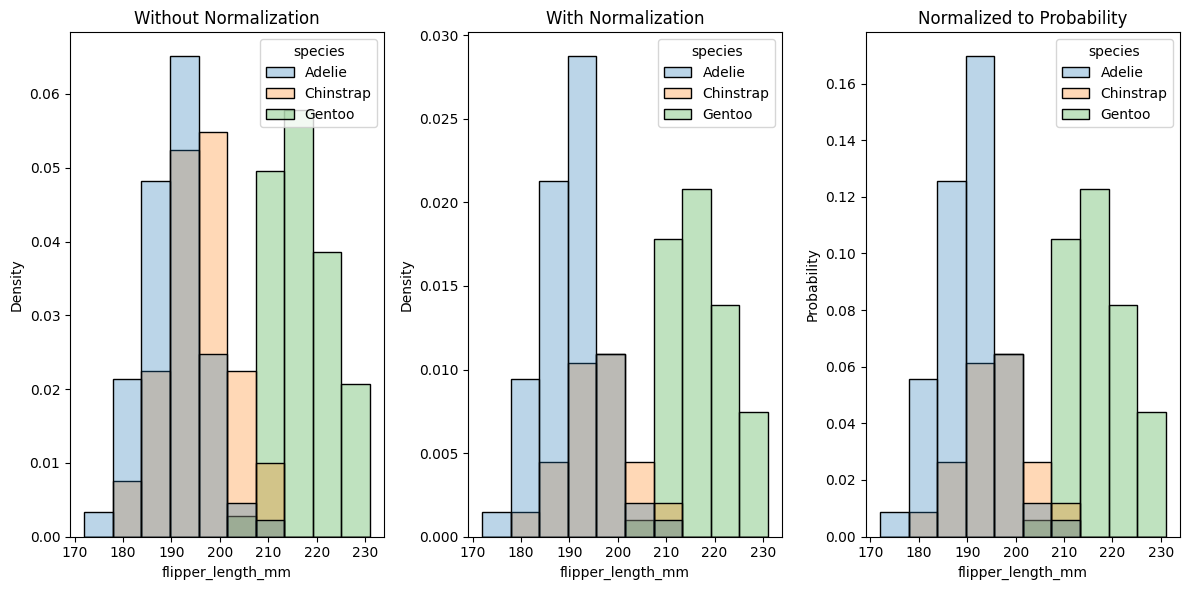

In [61]:
# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Subplot 1: without normalization
plt.subplot(1, 3, 1)
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", stat="density", common_norm=False, alpha=0.3)
plt.title("Without Normalization")

# Subplot 2: with normalization
plt.subplot(1, 3, 2)
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", stat="density", alpha=0.3)
plt.title("With Normalization")

# Subplot 3: Plotting the distribution of flipper lengths normalized by probability
plt.subplot(1, 3, 3)
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", stat="probability", element="bars", alpha=0.3)
plt.title("Normalized to Probability")

plt.tight_layout()
plt.show()


## Kernel Density Estimation

> A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:


Kernel Density Estimation (KDE) is a powerful non-parametric way to estimate the probability density function of a random variable. KDE plots are especially useful in data analysis as they provide a smooth, continuous visualization of the distribution, which can reveal important features like central tendency, multimodality, skewness, and tail behavior. However, despite these advantages, KDE also has limitations that can sometimes lead to misleading representations of data. Here’s a deeper dive into the strengths and weaknesses of KDE plots:

### Advantages of KDE Plots

1. **Visualization of Distribution Shape:** KDE plots provide a clear view of the distribution’s shape, making it easier to identify features like peaks (modes), skewness (asymmetry of the data), and kurtosis (tailedness).
   
2. **Comparison Between Subsets:** KDE is particularly useful for comparing the distribution of a variable across different subsets of data. By overlaying multiple KDE curves on a single plot, one can visually compare how a variable’s distribution differs across groups, such as different demographic categories or experimental conditions.

3. **Smoothness and Continuity:** Unlike histograms, which are dependent on the choice of bins, KDE provides a smooth curve that can give a more accurate sense of the “true” underlying distribution, assuming the distribution is continuous.

### Considerations

When using KDE, it's essential to consider limitations and adjust the approach accordingly. This might involve:
- Choosing a suitable kernel and bandwidth that respect the nature of the data.
- Applying boundary corrections if the data has natural limits.
- Using KDE in conjunction with other statistical tools to ensure a robust understanding of the data's characteristics.

In summary, while KDE plots are a valuable tool for data visualization and analysis, their effectiveness is contingent upon the suitability of the assumptions they make regarding the data. Analysts must be aware of these considerations to avoid misinterpretations that could lead to erroneous conclusions.

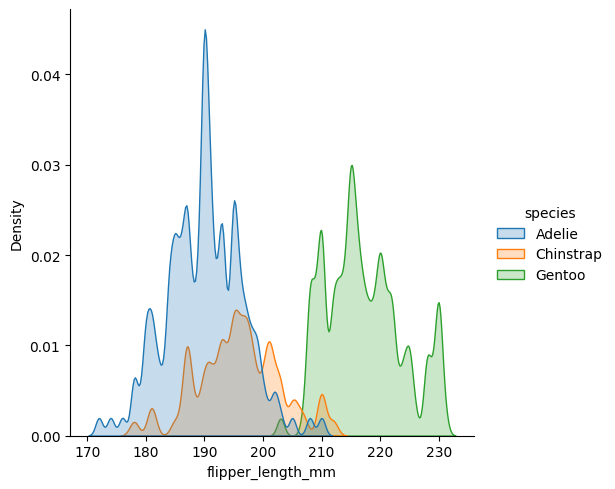

In [76]:
sns.displot(
    penguins, 
    x="flipper_length_mm", 
    hue="species", 
    kind="kde", 
    bw_adjust=.25, 
    fill=True
)
plt.show()

## Empirical cumulative distributions

> A third option for visualizing distributions computes the “empirical cumulative distribution function” (ECDF). This plot draws a monotonically-increasing curve through each datapoint such that the height of the curve reflects the proportion of observations with a smaller value. The ECDF plot has two key advantages. Unlike the histogram or KDE, it directly represents each datapoint. That means there is no bin size or smoothing parameter to consider. Additionally, because the curve is monotonically increasing, it is well-suited for comparing multiple distributions:

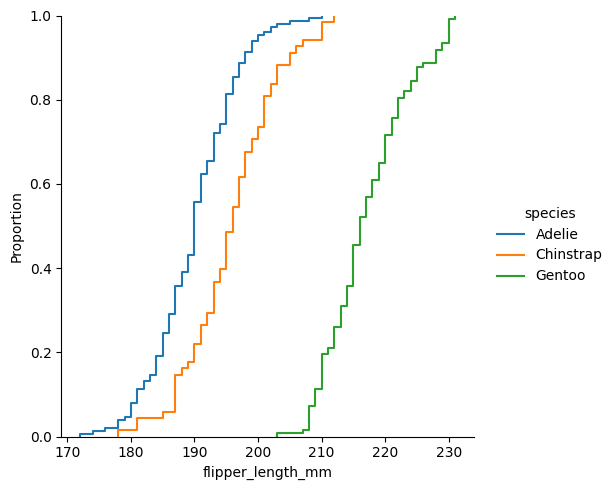

In [50]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")
plt.show()

## Visualizing bivariate distributions

When analyzing the relationship between two continuous variables, visualizing their bivariate distribution can provide insightful information. In this context, we'll discuss two approaches using Seaborn's displot function: scatter plots and KDE plots, highlighting their differences and use cases.

### Scatter Plot

In a scatter plot, each point represents an observation in the dataset, plotted according to its values for two variables.

*Advantages*:

- Direct Representation: Scatter plots provide a straightforward visualization of the actual data points, making it easy to see clusters, trends, and potential outliers.

- Clarity: They clearly show the relationship between the two variables, including any linear or non-linear correlations.

*Disadvantages*:

- Overplotting: In datasets with many points, scatter plots can suffer from overplotting, where points overlap and obscure each other, making it difficult to discern the underlying pattern.

- No Density Information: Scatter plots do not inherently convey the density of points in different regions of the plot.

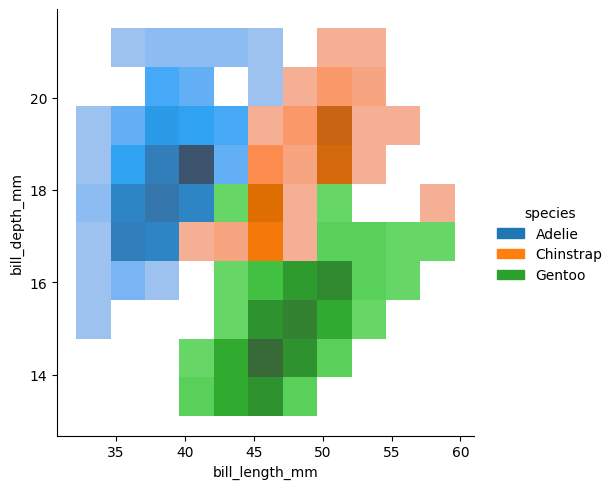

In [55]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
plt.show()

### KDE Plot

A KDE plot uses kernel smoothing to estimate the probability density function of the variables. This results in a smooth contour plot that represents the density of observations.

*Advantages*:

- Density Representation: KDE plots effectively show the density of data points, highlighting regions where observations are concentrated.

- Smooth Visualization: They provide a smooth, continuous visualization of the data distribution, which can reveal underlying patterns more clearly than scatter plots in some cases.

*Disadvantages*:

- Assumption of Smoothness: KDE plots assume that the underlying distribution is smooth, which might not always be true. This can sometimes lead to misleading interpretations if the data has sharp boundaries or discrete jumps.

- Computational Intensity: Generating KDE plots can be more computationally intensive than scatter plots, especially with large datasets.

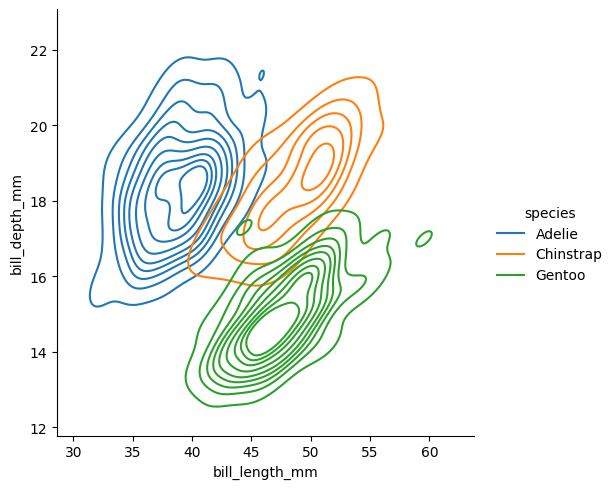

In [54]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")
plt.show()

### Jointplot with Scatter and Histplot

> The first is `jointplot()`, which augments a bivariate relational or distribution plot with the marginal distributions of the two variables. By default, `jointplot()` represents the bivariate distribution using `scatterplot()` and the marginal distributions using `histplot()`:

The `sns.jointplot()` function in Seaborn creates a comprehensive visualization that combines a scatter plot of two variables with their corresponding marginal distributions. This allows for a detailed exploration of the relationship between the two variables, in this case, `bill_length_mm` and `bill_depth_mm` from the penguins dataset.


What the Graph Tells Us
- *Scatter Plot*: The main plot in the center is a scatter plot showing individual data points where each point represents a penguin. The x-axis represents the bill_length_mm, and the y-axis represents the bill_depth_mm. Each point's position is determined by these two measurements.

- *Marginal Distributions*: Along the top and right edges of the scatter plot are histograms that show the marginal distributions of bill_length_mm and bill_depth_mm, respectively. These histograms provide insight into the distribution of each variable independently.

- *Clusters and Patterns*: By examining the scatter plot, we can observe clusters of points that suggest groupings of penguins with similar bill lengths and depths. Points that are close together indicate similar measurements, while points that are farther apart indicate more significant differences.

- *Relationship Between Variables*: The scatter plot helps visualize the relationship between bill length and bill depth. If the points form a clear pattern (e.g., a diagonal line), it suggests a strong correlation between the two variables. A more dispersed pattern would indicate a weaker relationship.

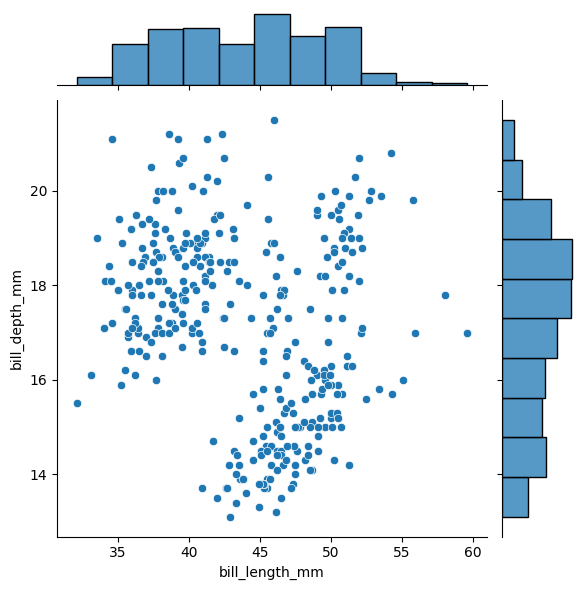

In [56]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
plt.show()

We can now visualize the same graph using the `hue` parameter that will allow us to see if there're patterns between different species.

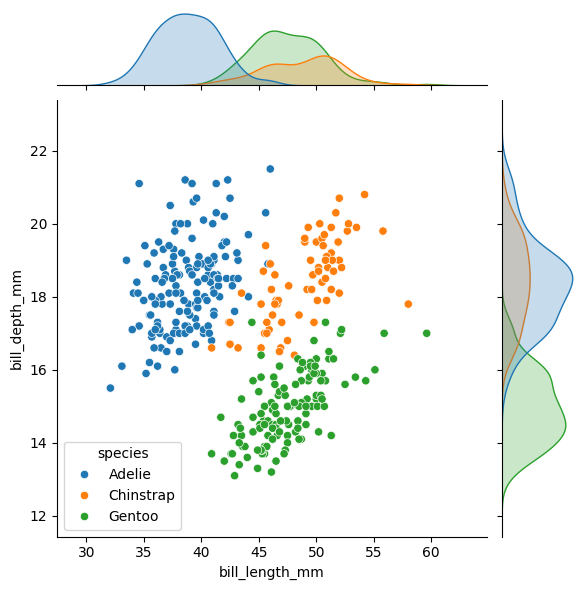

In [65]:
sns.jointplot(
    data=penguins, 
    x="bill_length_mm", y="bill_depth_mm", hue="species"
)
plt.show()

We could see it using `kde`  as well

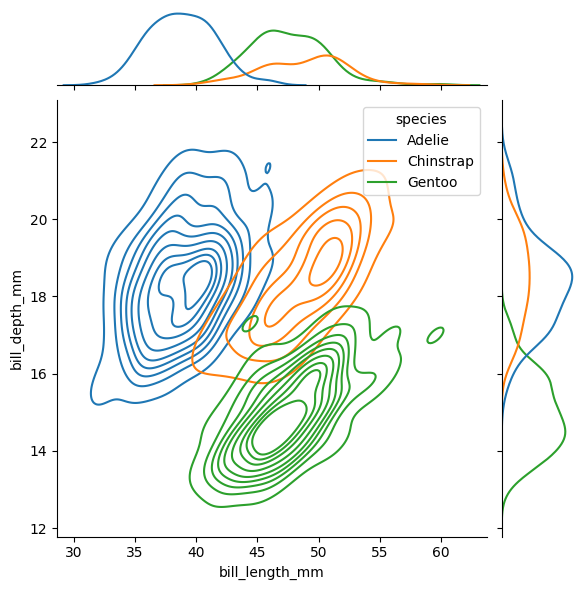

In [67]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)
plt.show()

Let's visualize some other graphs we can obtain

`JointGrid`

**Description**: This plot uses JointGrid to create a combined visualization. The main plot shows a histogram of bill_length_mm and bill_depth_mm, while the marginal plots display boxplots. This combination helps in understanding the distribution and summary statistics (like quartiles and outliers) of the variables.

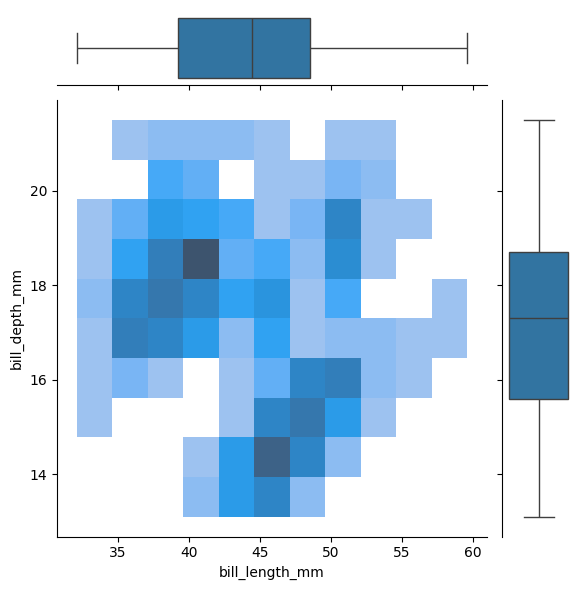

In [93]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

# Conclusion

The graphs above provide valuable insights into the dataset's organization, aiding in decision-making when developing a predictive model. It's crucial to examine these distributions to avoid any preconceived notions about the data.